In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Sampledata/insurance_data.txt')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


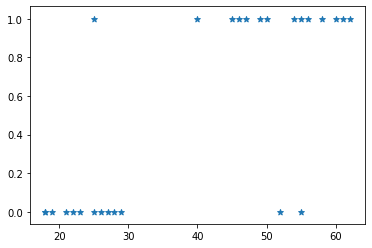

In [3]:
plt.scatter(df['age'], df['bought_insurance'], marker='*')

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size=0.1)


In [5]:
X_train.shape

(24, 1)

In [6]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred = log_reg.predict(X_test)


from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

In [8]:
acc

1.0

In [9]:
y_pred

array([1, 0, 0], dtype=int64)

In [10]:
X_test

,age
5,56
26,23
20,21


In [11]:
log_reg.score(X_test,y_test)

1.0

In [12]:
log_reg.predict(X_test)

array([1, 0, 0], dtype=int64)

In [13]:
log_reg.predict([[50]])

array([1], dtype=int64)

In [ ]:
# logistic regression on sklearn internal dataset - Hand written digits

In [21]:
from sklearn.datasets import load_digits

In [22]:
dig = load_digits()

In [23]:
dir(dig)

['DESCR', 'data', 'images', 'target', 'target_names']

In [25]:
dig.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

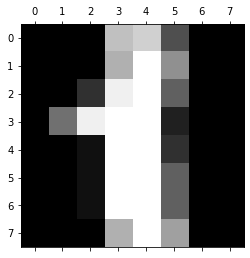

In [28]:
#plt.gray()
plt.matshow(dig.images[1])


In [31]:
X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, test_size=0.2)

In [32]:
log_reg.fit(X_train, y_train)

C:\Users\Ramesh Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
X_test.shape

(360, 64)

In [36]:
log_reg.predict([dig.data[4]])

array([4])

In [37]:
log_reg.score(X_test,y_test)

0.9694444444444444

In [41]:
log_reg.predict([dig.data[43]])

array([7])

7


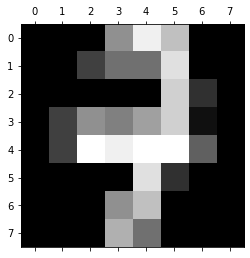

In [45]:
print(dig.target[43])
plt.matshow(dig.images[43])

In [46]:
from sklearn.metrics import confusion_matrix

In [52]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 42,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 37]], dtype=int64)

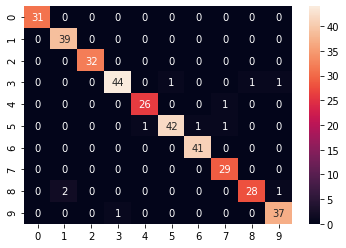

In [58]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, y_pred),annot=True)